<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing

_Authors: Alexander Egorenkov (DC)_

---

In [13]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [6]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('../data/advertising.csv', index_col=0)
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<a id="introduction-to-hypothesis-testing"></a>
## Introduction to Hypothesis Testing
---

**Objective**: Test a hypothesis within a sample case study.

You'll remember that we've worked previously on descriptive statistics such as mean and variance. How would we tell if there is a difference between our groups? How would we know if this difference was real or if our finding is simply the result of chance?

For example, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme, Inc.? Hypothesis testing!

> **Note:** In this course, hypothesis testing is primarily used to assess foundational models such as linear and logistic regression.

### Hypothesis Testing Steps

Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis**, which is the opposite of the null. Then, you check whether the data support rejecting your null hypothesis or fail to reject the null hypothesis.

For example:

    Null hypothesis: There is no relationship between gender and sales.
    Alternative hypothesis: There is a relationship between gender and sales.

Note that "failing to reject" the null hypothesis is not the same as "accepting" it. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important for helping you avoid overstating your findings. You should only state what your data and analysis can truly represent.

<a id="validate-your-findings"></a>
### Validate Your Findings

#### How Do We Tell if the Association We Observed is Statistically Significant?

Statistical significance is the likelihood that a result or relationship is caused by something other than mere random chance. Statistical hypothesis testing is traditionally employed to determine whether or not a result is statistically significant.

We might ask: **How likely is the effect observed to be true, assuming the null hypothesis is true?** If the probability of our observation occurring by chance is less than 5 percent (supposing the null hypothesis), then we reject the null hypothesis. Note that the 5 percent value is in many ways arbitrary — many statisticians require even higher confidence levels.

The probability of our observations occurring by chance, given the null hypothesis, is the **pvalue** ($p$).

---

**Example:** Suppose you flip a coin three times and get three heads in a row. These three flips are our observations.

+ We want to know whether or not the coin is fair. So, we select the **null hypothesis: The coin is fair.**
+ Now, let's suppose the null hypothesis is true. Three heads in a row occurs with a chance of $1/2^3 \approx 12.5\%$.
+ Because there is a reasonable ($> 5\%$) chance of three heads occuring naturally, we do not reject the null hypothesis.
+ So, **we conclude** that we do not have enough data to tell whether or not the coin is fair ($p = 0.125$).

---

In other words, we say that something is NOT statistically significant if there is a less than 5 percent chance that our finding was caused by chance alone (assuming the null hypothesis is true).

<a id="confidence-intervals"></a>
### Confidence Intervals

A closely related concept is **confidence intervals**. A 95 percent confidence interval can be interpreted like so: under infinite sampling of the population, we would expect that the true value of the parameter we are estimating to fall within that range 95% of the time.

Keep in mind that we only have a **single sample of data** and not the **entire population of the data**. The "true" effect/difference is either within this interval or it is not. We have no firm knowledge, however, that our single estimate of the "true" effect/difference is close or not to the "truth". The confidence interval around our estimate tells us, with a given sample size and level of confidence, the range in which future estimates are likely to fall.

Note that using 95 percent confidence intervals is just a convention. You can create 90 percent confidence intervals (which will be more liberal), 99 percent confidence intervals (which will be more conservative), or whatever intervals you prefer.


<a id="error-types"></a>
### Error Types

Statisticians often classify errors not just as errors but as one of two specific types of errors — type I and type II.

+ **Type I errors** are false positives.
    - Machine learning: Our model falsely predicts "positive." (The prediction is incorrect.)
    - Statistics: Incorrect rejection of a true null hypothesis.


+ **Type II errors** are false negatives.
    - Machine learning: Our model falsely predicts "negative." (The prediction is incorrect.)
    - Statistics: Incorrectly retaining a false null hypothesis.

Understanding these errors can be especially beneficial when designing models. For example, we might decide that type I errors are OK but type II errors are not. We can then optimize our model appropriately.

> **Example:** Suppose we make a model for airline security in which we predict whether or not a weapon is present ("positive"). In this case, we would much rather have type I errors (falsely predict a weapon) than type II errors (falsely predict no weapon).

> **Example:** Suppose we make a model for the criminal justice system in which we whether or not a defendant is guilty ("positive"). In this case, we would much rather have type II errors (falsely predict innocent) than type I errors (falsely predict guilty).

Can you phrase these examples in terms of null hypotheses?

### The Test Statistic

A standardized measure of communicating how far away you are from the group average.  

In a normal distribution, this is communicated as the standard deviation or standard error.

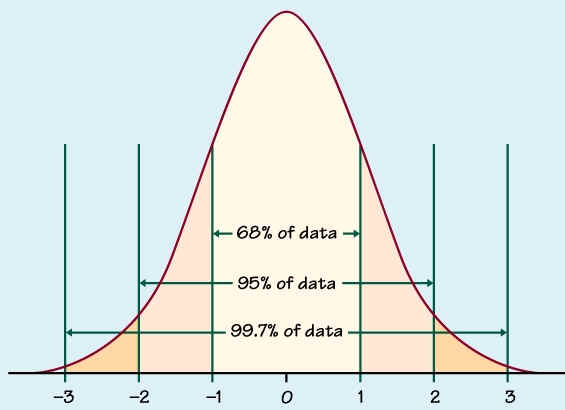

In [1]:
from IPython.display import Image
Image(filename='z-score.jpg')

### Group Activity:  Were The Amounts Spent on Newspaper and Radio Ads Significantly Different From One Another?

#### Going to do Two Things:

 - perform a comparison of means using the normal distribution / z-test
 - report the test statistic and the p-value from your result

In [17]:
sm.stats.ztest(data['radio'], data['newspaper'])

(-3.911403345381785, 9.176137849809707e-05)

### Inferring Normality 

 - aka -- how do we know our data is acceptably normal in the 1st place?

### Inferring Subjectively:
 - histograms
 - boxplots
 - qqplots (very useful)
 
### Inferring Analytically:
 - shapiro-wilk test
 - kolmogorov-smirnov test

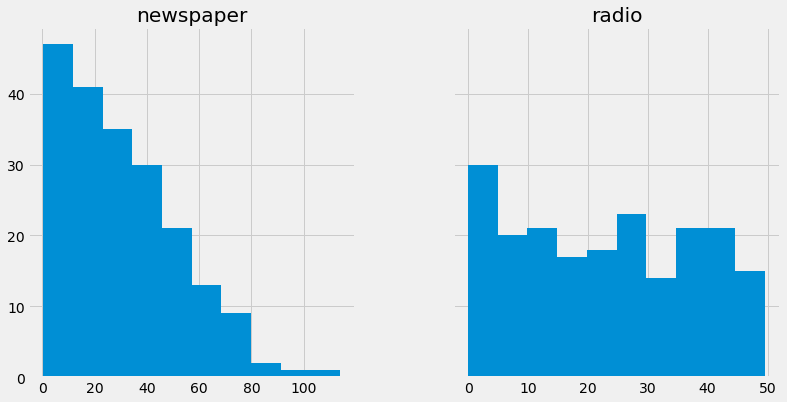

In [22]:
data[['radio', 'newspaper']].hist(sharey=True, figsize=(12, 6));

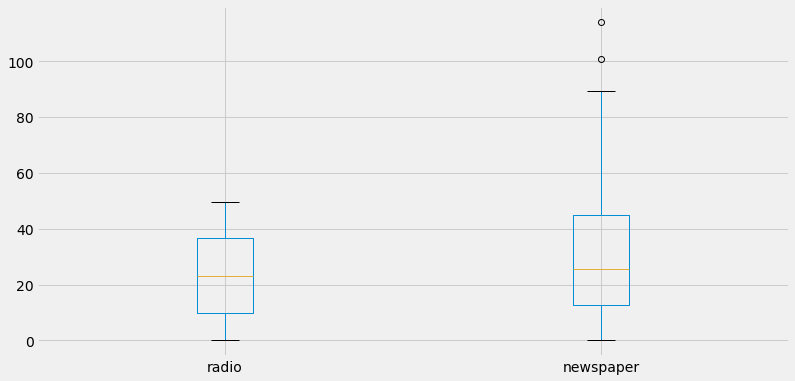

In [24]:
data[['radio', 'newspaper']].boxplot(figsize=(12, 6));

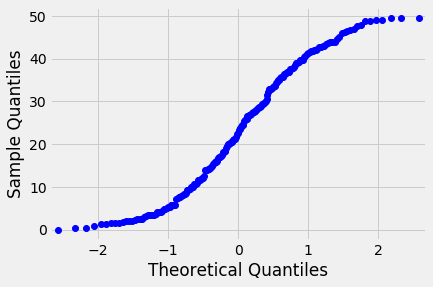

In [35]:
from statsmodels.graphics.gofplots import qqplot
x = qqplot(data['radio'])

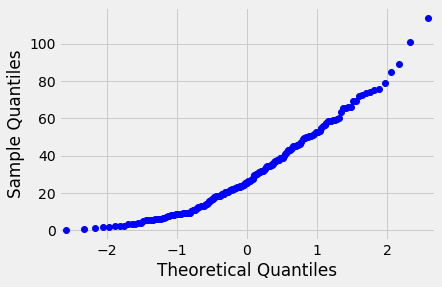

In [34]:
x = qqplot(data['newspaper'])

### Shapiro Wilk

 - Most commonly used test for normality
 - Considered the most reliable
 - Accuracy might begin to taper off with sample sizes > 2000
 - Tests null hypothesis that the data is normal
 
#### Returns two values:

 - test statistic
 - p value, representing chance that the data is normal

### Your Turn:  What is the Test Statistic and p-value for the Shapiro-Wilk Test on the Radio Column?

In [47]:
from scipy.stats import shapiro

test_statistic, p_value = shapiro(data['radio'])
print("Shapiro test statistic: ", test_statistic, "P-vlaue: ", p_value)

Shapiro test statistic:  0.9440046548843384 P-vlaue:  5.196915822125447e-07


### Kolmogorov-Smirnov

 - Flexible test that can be used to test for adherence to ANY distribution
 - A bit more relaxed in how it makes assumptions about data
 - More conservative in the way it generates p-values
 - requires **standardized** data
 
#### Returns two values:

 - test statistic
 - p value, representing chance that the data fits the specified distribution of choice

### Your Turn:  What is the Test Statistic and p-value for the Kolmogorov-Smirnov Test on the Radio Column?

### Do Two Things:

 - Standardize your data by subtracting that column from its mean and dividing by its standard deviation
 - use the describe() method to verify that its average is (practially) zero, and variance is 1.
 - run the kstest from scipy to get the results for your test statistic and p-value
 - write your test statistic and p-value on your name plate

In [48]:
from scipy.stats import kstest

radio_data = (data['radio'] - data['radio'].mean()) / data['radio'].std()
test_stat, p_value = kstest(radio_data, cdf='norm')
print("KS Test Statistic: ", test_stat, "P Value: ", p_value)

KS Test Statistic:  0.08395825811656044 P Value:  0.11261277203399489


## Class Challenge: A/B Testing Hypothesis Tests

<a id="scenario"></a>

---

### Scenario

You are a data science team working for a web-based company and you are planning to roll out a new website design. One of two competing designs were presented to random samples of users, and their ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases and if the result is statistically significant.

In [49]:
# Generate some data and randomize.

# Some people bought nothing, the others bought 
# with some distribution.
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

# The second design hooked less people, 
# but those that were hooked bought more stuff.
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

# Make a DataFrame.
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head() 

,A,B
0,16.782089,0.000000
1,13.230268,0.000000
2,18.464874,0.000000
3,24.045298,0.000000
4,14.886829,21.396978


### Group Activity:

Recreate the following steps we just took on the advertising dataset to determine whether or not the groups of spending are different, and perform the following:

 - perform a z-test to compare the means
 - visualize column A & B in the following way:
   - boxplot
   - qqplot
   - histogram
 - run a shapiro wilk test and kstest to get their test statistics

In [54]:
sm.stats.ztest(df['A'], df['B'])

(0.660035191599837, 0.5092312461837722)

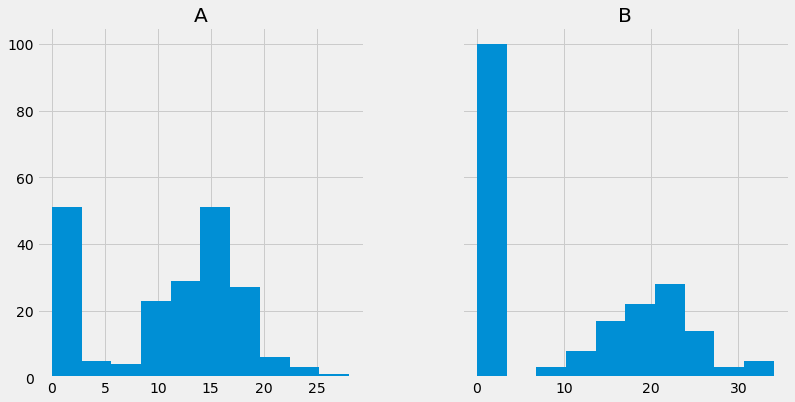

In [51]:
df.hist(sharey=True, figsize=(12, 6));

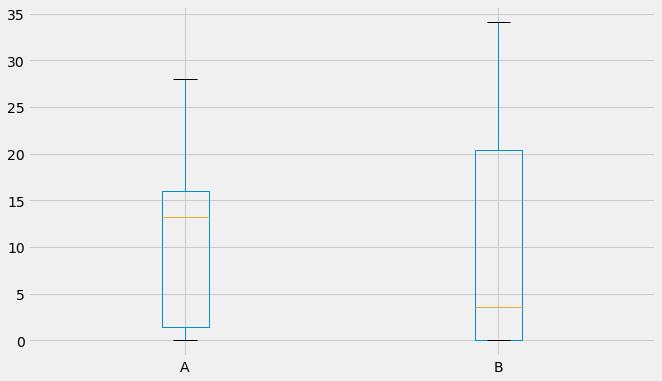

In [53]:
# generate boxplots
df.boxplot(figsize=(10, 6));

#### Make a box plot of the two groups:

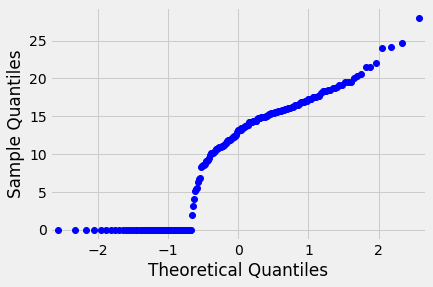

In [83]:
x = qqplot(df['A'])

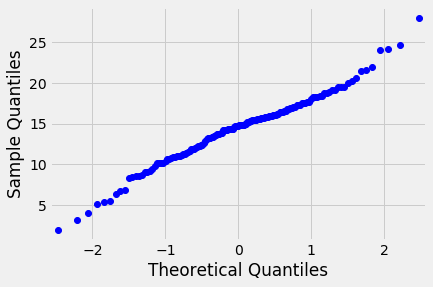

In [59]:
x = qqplot(df[df.A > 0]['A'])

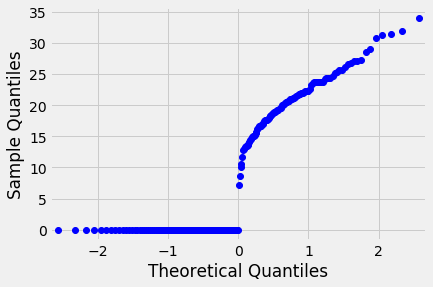

In [85]:
x = qqplot(df['B'])

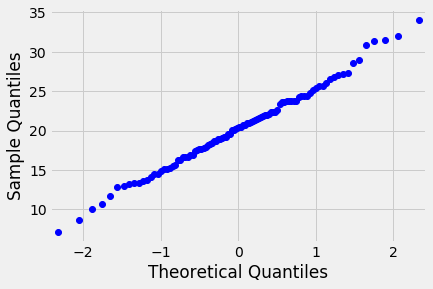

In [60]:
x = qqplot(df[df.B > 0]['B'])

In [62]:
test_stat, p_value = shapiro(df['A'])
print(test_stat, p_value)

0.8830593228340149 2.378112463896631e-11


In [63]:
test_stat, p_value = shapiro(df[df.A > 0]['A'])
print(test_stat, p_value)

0.984200656414032 0.08374284952878952


In [72]:
shifted_data = df[df.A > 0]['A']
shifted_data = (shifted_data - shifted_data.mean()) / shifted_data.std()
test_stat, p_value = kstest(shifted_data, cdf='norm')
print(test_stat, p_value)

0.07408774424294062 0.36694034684151555


### Moving Beyond Normality

The bell curve has its limitations.  Makes lots of assumptions that don't always play out in the field.  

What are alternatives?

<a id="statistical-tests"></a>
### Statistical Tests

#### Parametric Tests: 
* [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)

#### Non-Parametric Tests:
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)
* [Kruskall-Wallis Test](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)

**Each test makes various assumptions:**
* ANOVA assumes the residuals are normally distributed and data have equal variances.
* The Welch t-test assumes normal distributions but not necessarily equal variances and more effectively accounts for small sample sizes.
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, producing a weaker p value.
* The Kruskall-Wallis Test is used to compare means between 2 or more groups.  Essentially a non-parametric one way ANOVA.

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (producing stronger p values) but can be misleading with data sets that don't satisfy the assumptions.

### Student's T Test:

 - Similar to normal, but does not assume that you know the variance of the population
 - In practice, this is usually true
  - Still built on the assumption of normality -- just unknown variance
  - Tends to be more useful with smaller sample sizes
  - T-test statistics are often used to evaluate regression results, which will be discussed on Monday.

### Your Turn -- Find the t-test statistic and p-value for the last exercise we just concluded.  How does it change, if at all?

In [77]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df['A'], df['B'], equal_var=False)
print(test_stat, p_value)

0.6600351915998371 0.5096698782470357


#### ANOVA

Stands for ANalysis Of  VAriance.

 - Also used to compare means
 - Can be used to compare *multiple* groups
 - Uses the F-distribution to perform its calculations -- essentially a comparison of variances
  - Has an assumption of equal *variances* between groups

Comes in a few different flavors:

 - One way ANOVA:
  - most common:  used for comparing means across 2 or more groups
  - Essentially an extension of the student's t-test:  makes no assumptions about variance
  
 - Other flavors:
  - **Factorial ANOVA:** compare means subject to different variables.
   - ie, when people are male/female or ethnicity black/white/hispanic, do their values for some such measure differ?
  - **Repeated Measures ANOVA:** When a certain group of people does the same thing over and over again, are the results significantly different? 

### Kruskal-Wallis Test

Non-paramentric version of ANOVA test.

Similar story to other versions of this dichotomy:
 - parametric tests are more accurate when fitted to appropriate data
  - quicker to pick up a signal
  - more error prone when data is noisy
  
Kruskall-Wallis is more relaxed in the assumptions that it makes, can be applied indiscriminately to data of all types.

### Your Turn:  

 - Using the original advertising dataset, use a one way ANOVA + Kruskall-Wallis test to determine whether or not the amount spent on the different advertising channels are significantly different or not.  
 
Write the larger test statistic on the whiteboard, with its associated test.

In [94]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(data['radio'], data['TV'], data['newspaper'])
print(test_stat, p_value)

358.8514595342596 4.552931539744962e-103


In [96]:
from scipy.stats import kruskal

test_stat, p_value = kruskal(data['radio'], data['TV'], data['newspaper'])
print(test_stat, p_value)

257.66637166931656 1.1180424828789922e-56


### Statistical Significance vs. Statistical Importance

 -- Ie, should you always care about statistically significant p values?

### Effect Size -- A Scale Independent Way of Comparing Values

P-values are partially derived from the **size** of your dataset.  This means that larger sample sizes will require smaller differences between them to generate p-values < .05.  

Lots of times this generates means-testing results that are significant, but not important.  

Ie, if two groups of data are .3% different from each other with a p-value of .023, should we still care?

Effect size is a way of comparing differences between groups that is **scale independent**.  This is very useful for reporting alongside a p-value, because they often communicate different things.

An effect size often accords with our intuitions about differences between groups more frequently than p-values often do.

**Downer**:  The python statistics libraries do NOT regularly include an effect size with their functions, so you'll have to calculate them yourselves.

### Most Commonly Used Measure for Effect Size:  Cohen's D

### Cohen's D

$$ \frac{\mu_{1} - \mu_{2}}{\sigma_{pooled}} $$

Pooled standard deviation for two groups:

$$ \sigma_{pooled} = \sqrt{\frac{(n_1 - 1)\sigma_1^2 + (n_2 - 1)\sigma_2^2}{2}} $$

### Important Details:  

 - This measurement is reported in standard deviations, which is helpful since you maintain the same units of measurement
 
 - Rough guide for how to interpret effect sizes:
  - **< 0.1**: Small effect
  - **0.1 < Cohen's D < 0.4**: Medium effect
  - **>0.4**: Large effect

### Challenge:

Can you write a function that measures the Cohen's D metric when comparing two groups? 

Is very useful when reporting results of statistical analysis.